In [1]:
%reload_ext autoreload
%autoreload 2


In [109]:
import torch
import torch.nn as nn
import numpy as np
from BNN_Dropout import BNN_Dropout
import matplotlib.pyplot as plt

In [110]:
num_train = 20
train_x = np.random.uniform(-4,4,num_train).reshape(num_train,1)
train_y = train_x**3 + 3 * np.random.randn(num_train,1)
xs = np.linspace(-6,6,100).reshape(100,1)
ys = xs**3

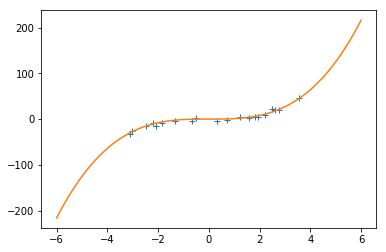

In [111]:
plt.plot(train_x, train_y, '+')
plt.plot(xs,ys)

In [155]:
conf = dict()
conf['print_every'] = 50
conf['dropout_rate'] = 0.5
conf['num_epochs'] = 400
conf['tau'] = 1 / 9.
conf['lr'] = 1e-2
model = BNN_Dropout(dim=1, act = nn.ReLU(),num_hiddens=[100],conf = conf)

In [156]:
model.train(torch.FloatTensor(train_x), torch.FloatTensor(train_y))

[Epoch    50, loss = 0.137974]
[Epoch   100, loss = 0.0779164]
[Epoch   150, loss = 0.0717138]
[Epoch   200, loss = 0.0318742]
[Epoch   250, loss = 0.0440891]
[Epoch   300, loss = 0.0351942]
[Epoch   350, loss = 0.0480597]
[Epoch   400, loss = 0.0399708]


In [157]:
nns, precs = model.sample(num_samples=100)
with torch.no_grad():
    m,v = model.predict_mv(input = torch.FloatTensor(xs), nn_samples=nns, prec_samples=precs)

Text(0.5,1,'MC-dropout')

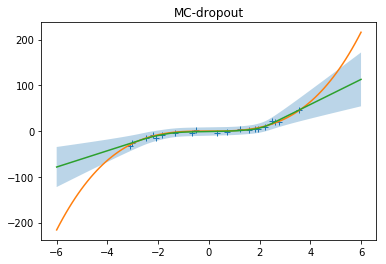

In [160]:
plt.plot(train_x, train_y, '+')
plt.plot(xs,ys)
plt.plot(xs,m.numpy())
plt.fill_between(xs.reshape(xs.shape[0]), (m + 3* v.sqrt()).numpy(), (m - 3*v.sqrt()).numpy(), alpha = 0.3)
plt.title('MC-dropout')